# Exercises

### For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 6)

import seaborn as sns
np.set_printoptions(suppress = True)


In [2]:
from vega_datasets import data
df = data.sf_temps()
df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


It looks like date column is already in datetime format.

In [4]:
# set and sorting index for date column
df = df.set_index('date').sort_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    8759 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


In [5]:
df.head(3)

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9


<AxesSubplot:xlabel='date'>

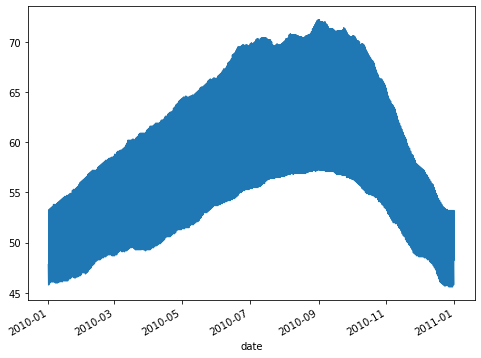

In [6]:
df.temp.plot()

# Use the above dataset for the exercises below:

# 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [7]:
df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


<AxesSubplot:xlabel='date'>

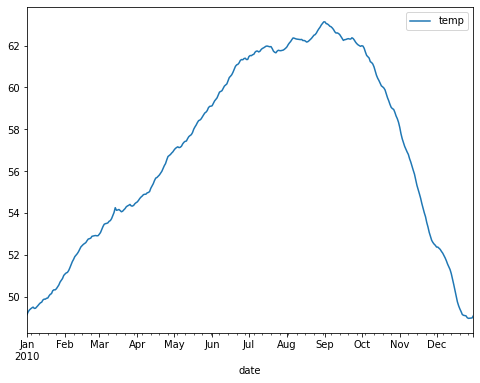

In [8]:
df.resample('D').mean().plot()

# 2. Write the code necessary to visualize the minimum temperature over time.

In [9]:
df.resample('D').min()

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1
...,...
2010-12-27,45.6
2010-12-28,45.6
2010-12-29,45.6


<AxesSubplot:xlabel='date'>

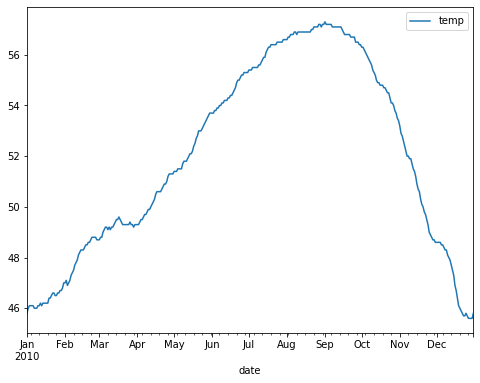

In [10]:
df.resample('D').min().plot()

# 3. Write the code necessary to visualize the maximum temperature over time.

In [11]:
df.resample('D').max().head()

,temp
date,
2010-01-01,53.3
2010-01-02,53.4
2010-01-03,53.5
2010-01-04,53.6
2010-01-05,53.8


<AxesSubplot:xlabel='date'>

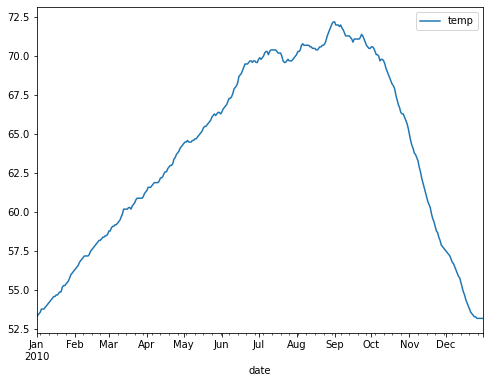

In [12]:
df.resample('D').max().plot()

# 4. Which month is the coldest, on average?

In [13]:
df.resample('M').mean()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


In [14]:
df.resample('M').mean().min().head()

temp    49.98414
dtype: float64

In [15]:
df.resample('M').mean().temp.sort_values()

date
2010-01-31    49.984140
2010-12-31    50.498253
2010-02-28    52.243899
2010-03-31    53.956528
2010-11-30    55.185139
2010-04-30    55.633056
2010-05-31    57.970968
2010-10-31    60.253091
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
Name: temp, dtype: float64

In [16]:
df.resample('M').mean().temp.sort_values().head(1)

date
2010-01-31    49.98414
Name: temp, dtype: float64

# 5. Which month has the highest average temperature?

In [17]:
df.resample('M').mean().temp.sort_values().tail(1)

date
2010-09-30    62.487083
Name: temp, dtype: float64

# 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [18]:
Daily_Range = df.resample('D').agg(['min', 'max'])
Daily_Range

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8
...          ...   ...
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

[365 rows x 2 columns]

# 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

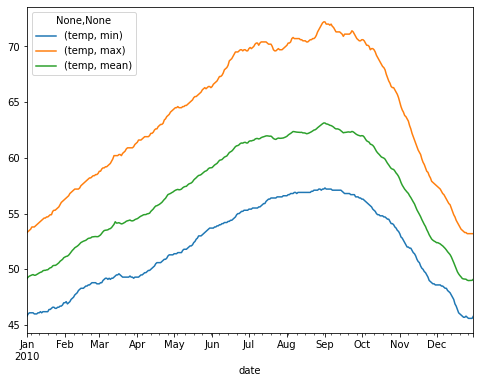

In [19]:
df.resample('D').agg(['min', 'max', 'mean']).plot()

In [20]:
from vega_datasets import data
df_seattle = data.seattle_weather()
df_seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


# Use the dataset to answer the following questions:

In [21]:
# checking date column
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [22]:
# setting date as index and sorting the index
df_seattle = df_seattle.set_index('date').sort_index()
df_seattle.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


- Which year and month combination has the highest amount of precipitation?

In [23]:
df_seattle.resample('M').sum().precipitation.sort_values().tail(1)

date
2015-12-31    284.5
Name: precipitation, dtype: float64

- Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

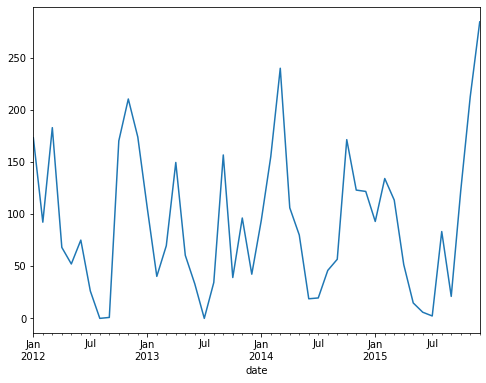

In [24]:
df_seattle.precipitation.resample('M').sum().plot()

- Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

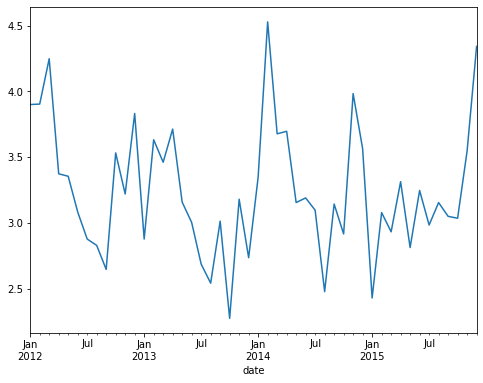

In [25]:
df_seattle.wind.resample('M').mean().plot()

<AxesSubplot:xlabel='date'>

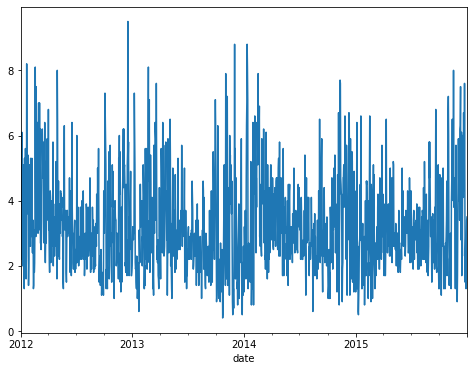

In [26]:
df_seattle.wind.resample('D').mean().plot()

- Which year-month combination is the windiest?

In [27]:
df_seattle.wind.resample('M').mean().sort_values().tail(1)

date
2014-02-28    4.528571
Name: wind, dtype: float64

- What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [28]:
df_seattle.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [29]:
# Lets make a new column 'is_sunny'
df_seattle['is_sunny'] = df_seattle.weather == 'sun'
df_seattle.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False
2012-01-03,0.8,11.7,7.2,2.3,rain,False
2012-01-04,20.3,12.2,5.6,4.7,rain,False
2012-01-05,1.3,8.9,2.8,6.1,rain,False


In [30]:
df_seattle.is_sunny.resample('Y').mean()

date
2012-12-31    0.322404
2013-12-31    0.561644
2014-12-31    0.578082
2015-12-31    0.493151
Freq: A-DEC, Name: is_sunny, dtype: float64

In [31]:
df_seattle.is_sunny.resample('Y').mean().sort_values().tail(1)

date
2014-12-31    0.578082
Name: is_sunny, dtype: float64

- In which month does it rain the most?

In [32]:
df_seattle['month'] = df_seattle.index.month

In [33]:
df_seattle.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny,month
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,1
2012-01-02,10.9,10.6,2.8,4.5,rain,False,1
2012-01-03,0.8,11.7,7.2,2.3,rain,False,1
2012-01-04,20.3,12.2,5.6,4.7,rain,False,1
2012-01-05,1.3,8.9,2.8,6.1,rain,False,1


In [34]:
df_seattle.groupby('month').precipitation.sum().sort_values()

month
7      48.2
6     132.9
8     163.7
5     207.5
9     235.5
4     375.4
2     422.0
1     466.0
10    503.4
3     606.2
12    622.7
11    642.5
Name: precipitation, dtype: float64

In [35]:
df_seattle.groupby('month').precipitation.sum().sort_values().tail(1)

month
11    642.5
Name: precipitation, dtype: float64

- Which month has the most number of days with a non-zero amount of precipitation?

In [36]:
# Checking wether if it rained?
df_seattle['rained'] = df_seattle.precipitation > 0

In [37]:
df_seattle.head()

,precipitation,temp_max,temp_min,wind,weather,is_sunny,month,rained
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,1,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False,1,True
2012-01-03,0.8,11.7,7.2,2.3,rain,False,1,True
2012-01-04,20.3,12.2,5.6,4.7,rain,False,1,True
2012-01-05,1.3,8.9,2.8,6.1,rain,False,1,True


In [38]:
df_seattle.groupby('month').rained.mean().sort_values().tail(1)

month
12    0.653226
Name: rained, dtype: float64

In [39]:
flight_df = data.flights_20k()
flight_df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


- Convert any negative delays to 0.

In [40]:
# Checking date time format
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


It looks like date is already in datetime format

In [41]:
# setting index date and sorting index 
flight_df = flight_df.set_index('date').sort_index()
flight_df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [43]:
flight_df[flight_df.delay < 0] = 0

In [44]:
flight_df

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,0,0,0
2001-01-01 07:00:00,0,0,0,0
2001-01-01 07:00:00,0,303,MSY,HOU
...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU
2001-03-31 21:05:00,0,0,0,0
2001-03-31 21:05:00,0,0,0,0


- Which hour of the day has the highest average delay?

In [47]:
flight_df['hour'] = flight_df.index.hour
flight_df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6
2001-01-01 06:30:00,0,0,0,0,6
2001-01-01 07:00:00,0,0,0,0,7
2001-01-01 07:00:00,0,303,MSY,HOU,7


In [49]:
flight_df.groupby('hour').delay.mean().sort_values().tail(1)

hour
3    302.5
Name: delay, dtype: float64

- Does the day of the week make a difference in the delay amount?

In [50]:
flight_df['week_day'] = flight_df.index.day_name()
flight_df.head()

,delay,distance,origin,destination,hour,week_day
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday
2001-01-01 06:30:00,0,0,0,0,6,Monday
2001-01-01 07:00:00,0,0,0,0,7,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday


In [51]:
flight_df.groupby('week_day').delay.mean().sort_values()

week_day
Monday        7.165772
Saturday      8.431498
Tuesday       9.410866
Sunday       10.413542
Wednesday    11.032478
Thursday     12.821322
Friday       17.757596
Name: delay, dtype: float64

- Does the month make a difference in the delay amount?

In [52]:
flight_df['month'] = flight_df.index.month
flight_df.head()

,delay,distance,origin,destination,hour,week_day,month
date,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday,1
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday,1
2001-01-01 06:30:00,0,0,0,0,6,Monday,1
2001-01-01 07:00:00,0,0,0,0,7,Monday,1
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday,1


In [53]:
flight_df.groupby('month').delay.mean().sort_values()

month
3     9.875287
1    11.301592
2    12.306106
Name: delay, dtype: float64

# Bonus

In [55]:
from vega_datasets import data
energy_df = data.iowa_electricity()
energy_df.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [57]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [ ]:
# set index and sort index
energy_df = energy_df.set_index('year').sort_index()

In [61]:
energy_df.head(11)

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2001-01-01,Nuclear Energy,3853
2001-01-01,Renewables,1437
2002-01-01,Fossil Fuels,35991
2002-01-01,Nuclear Energy,4574
2002-01-01,Renewables,1963
2003-01-01,Fossil Fuels,36234
2003-01-01,Nuclear Energy,3988
2003-01-01,Renewables,1885


- For each row, calculate the percentage of the year's total that energy source provided.

In [63]:
# Tota energy by year
energy_df.net_generation.resample('YS').sum()

year
2001-01-01    40651
2002-01-01    42528
2003-01-01    42107
2004-01-01    43236
2005-01-01    44145
2006-01-01    45473
2007-01-01    49778
2008-01-01    53086
2009-01-01    51859
2010-01-01    57509
2011-01-01    56371
2012-01-01    56675
2013-01-01    56670
2014-01-01    56854
2015-01-01    56653
2016-01-01    54381
2017-01-01    56476
Freq: AS-JAN, Name: net_generation, dtype: int64

In [66]:
# mapping the resampled data above to the original DataFrame
energy_df['year_total'] = energy_df.index.map(energy_df.net_generation.resample('YS').sum())

In [67]:
energy_df.head()

,source,net_generation,year_total
year,,,
2001-01-01,Fossil Fuels,35361,40651
2001-01-01,Nuclear Energy,3853,40651
2001-01-01,Renewables,1437,40651
2002-01-01,Fossil Fuels,35991,42528
2002-01-01,Nuclear Energy,4574,42528


In [69]:
# now into our main question:
energy_df['percentage'] = energy_df.net_generation/energy_df.year_total

In [70]:
energy_df.head()

,source,net_generation,year_total,percentage
year,,,,
2001-01-01,Fossil Fuels,35361,40651,0.869868
2001-01-01,Nuclear Energy,3853,40651,0.094782
2001-01-01,Renewables,1437,40651,0.035350
2002-01-01,Fossil Fuels,35991,42528,0.846290
2002-01-01,Nuclear Energy,4574,42528,0.107553


- Lineplot of generation over time, color by source

In [72]:
df1 = energy_df.reset_index()

<AxesSubplot:xlabel='year', ylabel='net_generation'>

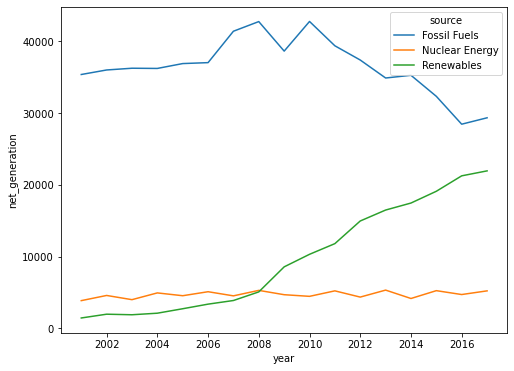

In [74]:
sns.lineplot(data = df1, x = 'year', y = 'net_generation', hue = 'source')

- Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [75]:
# Making a new column called year_part
energy_df['year_part'] = energy_df.index.year
energy_df.head()

,source,net_generation,year_total,percentage,year_part
year,,,,,
2001-01-01,Fossil Fuels,35361,40651,0.869868,2001
2001-01-01,Nuclear Energy,3853,40651,0.094782,2001
2001-01-01,Renewables,1437,40651,0.035350,2001
2002-01-01,Fossil Fuels,35991,42528,0.846290,2002
2002-01-01,Nuclear Energy,4574,42528,0.107553,2002


In [78]:
# Using pivot_table to have years as columns:
energy_pivot = energy_df.pivot_table(index = ['source'], columns = 'year_part', values = 'net_generation')
energy_pivot


year_part,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
source,,,,,,,,,,,,,,,,,
Fossil Fuels,35361,35991,36234,36205,36883,37014,41389,42734,38620,42750,39361,37379,34873,35250,32319,28437,29329
Nuclear Energy,3853,4574,3988,4929,4538,5095,4519,5282,4679,4451,5215,4347,5321,4152,5243,4703,5214
Renewables,1437,1963,1885,2102,2724,3364,3870,5070,8560,10308,11795,14949,16476,17452,19091,21241,21933


- Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

<AxesSubplot:xlabel='year'>

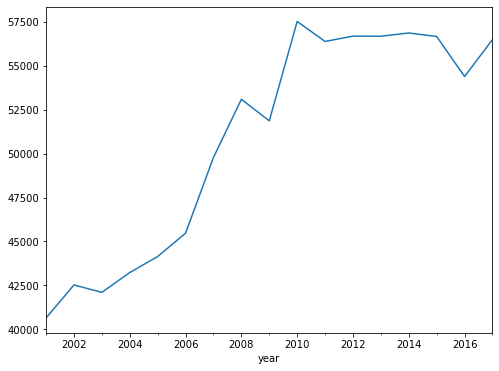

In [79]:
energy_df.net_generation.resample('YS').sum().plot()

- Is the total generation increasing over time?
-- How would you control for increasing consumption over time when considering how much energy is coming from each source?
-- express each number as a % of the year's total

In [80]:
# lets normalize the DataFrame (columnwise)
cols = list(energy_pivot.columns)
energy_pivot[cols] = energy_pivot[cols] / energy_pivot[cols].sum()
energy_pivot

year_part,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
source,,,,,,,,,,,,,,,,,
Fossil Fuels,0.869868,0.846290,0.860522,0.837381,0.835497,0.813978,0.831472,0.804996,0.744712,0.743362,0.698249,0.659532,0.615370,0.620009,0.570473,0.522922,0.519318
Nuclear Energy,0.094782,0.107553,0.094711,0.114002,0.102798,0.112045,0.090783,0.099499,0.090225,0.077397,0.092512,0.076700,0.093894,0.073029,0.092546,0.086482,0.092322
Renewables,0.035350,0.046158,0.044767,0.048617,0.061706,0.073978,0.077745,0.095505,0.165063,0.179242,0.209239,0.263767,0.290736,0.306962,0.336981,0.390596,0.388360


<AxesSubplot:xlabel='year_part'>

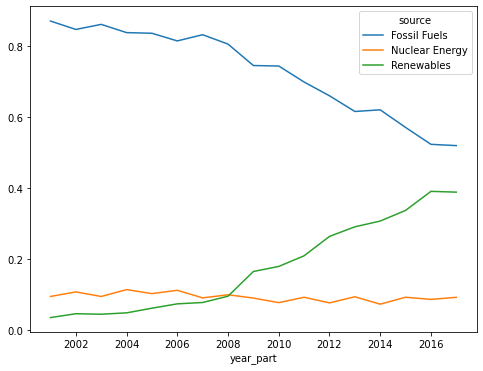

In [81]:
# transpose the dataframe above the plot for three sources
energy_pivot.T.plot()

# Takeaways:
- Fossil fuels consumption is dereasing where as Renewable energy consumption in increasing and nuclear fuels is kind of steady.